In [3]:
#author 
"shreyas raja created @time using LSTM - Sequence modelling"
import numpy as np
import pandas as pd #to load the data 
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression # doen initially to eliminate the NAns from the dataset 
from sklearn.model_selection import train_test_split #to split the data into training and testing   
from keras.preprocessing.sequence import TimeseriesGenerator # data processing for time series generator 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to convert the data fro float to a vector (one hot encoding)
from keras import metrics 
import tensorflow as tf # to describe the architecture of the neural networks 
#import seaborn as sns
import glob, os

linreg=LinearRegression()
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

In [16]:
df=pd.read_csv('Guld_Data_Raw.csv')
#df = df.fillna(method='ffill')
df= df.interpolate('linear')
#df = df.isnull().sum()
#df= df.dropna(subset= ['GW1430','HK4003U','HK4004U'], how='all').shape
#df = df.isnull().sum()
#df = df.fillna({'ET':0})
df


,date,R_H,Precipitation,ET,GW1428A,GW1430,GW285,HK4003U,HK4004U,HK4012H,...,HK4256U,HK4258U,HK4262U,HK4302H,SGU903074482,SGU909128423,SGU912799781,SGU912799806,SGU912799815,SGU912799853
0,7/12/2014,57.0,3.7,2.311069292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/13/2014,80.0,5.5,1.003075371,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/14/2014,90.0,0.0,1.536110847,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/15/2014,77.0,2.8,1.378046148,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2014,76.0,0.0,2.217789322,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,6/26/2020,72.0,1.0,2.041946536,44.29,16.740000,47.717958,17.984468,19.374400,21.992149,...,22.294167,17.905417,17.658750,19.06843,22.398251,19.813529,22.525714,24.95,21.69,22.59
2177,6/27/2020,73.0,6.5,2.279865846,44.29,16.746667,47.717958,17.982979,19.362083,21.992149,...,22.328750,17.969167,17.725417,19.06843,22.439857,19.812353,22.607143,24.95,21.69,22.59
2178,6/28/2020,82.0,2.5,1.222634836,44.29,16.753333,47.717958,17.981489,19.596667,21.992149,...,22.329583,18.062083,17.812083,19.06843,22.481462,19.811176,22.688571,24.95,21.69,22.59
2179,6/29/2020,70.0,5.5,1.80884821,44.29,16.760000,47.717958,17.980000,19.615417,21.992149,...,22.329583,18.125417,17.891667,19.06843,22.523068,19.810000,22.770000,24.95,21.69,22.59


In [17]:
#df1=pd.read_csv('Guld_Data_Raw.csv')
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#print(df1)
#df_with_null = df[['R_H','Precipitation','ET','HK4004U']].dropna()
#print(df1_with_null)
#df.head()
#print(df1)
#df_without_null = df_with_null.dropna()
#print(df_without_null)
#all features except wellid
#train_df_x= df_without_null.iloc[:,:3]
#print(train_df_x)

#train only well ID
#train_df_y = df_without_null.iloc[:,3]

#linreg.fit(train_df_x,train_df_y)

#predicting the whole dataset and replace with missing values only
#test_df = df_with_null.iloc[:,:3]
#pred['HK4004U'] = pd.DataFrame(linreg.predict(test_df))

#df_with_null.HK4004U.fillna(pred.HK4004U,inplace=True)
#df_with_null


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2181 non-null   object 
 1   R_H            2181 non-null   float64
 2   Precipitation  2181 non-null   float64
 3   ET             2181 non-null   object 
 4   GW1428A        2044 non-null   float64
 5   GW1430         2156 non-null   float64
 6   GW285          1932 non-null   float64
 7   HK4003U        2156 non-null   float64
 8   HK4004U        2156 non-null   float64
 9   HK4012H        2156 non-null   float64
 10  HK4013H        2156 non-null   float64
 11  HK4014H        2156 non-null   float64
 12  HK4101U        2156 non-null   float64
 13  HK4102U        2156 non-null   float64
 14  HK4115U        2036 non-null   float64
 15  HK4206U        1609 non-null   float64
 16  HK4226B        1304 non-null   float64
 17  HK4256U        926 non-null    float64
 18  HK4258U 

In [28]:
#df=df.interpolate('linear')
df= df.fillna({'ET':0})
df=df.loc[25:2181,:]
df

,date,R_H,Precipitation,ET,GW1428A,GW1430,GW285,HK4003U,HK4004U,HK4012H,...,HK4256U,HK4258U,HK4262U,HK4302H,SGU903074482,SGU909128423,SGU912799781,SGU912799806,SGU912799815,SGU912799853
25,2014-08-06,73.0,0.0,2.336222,NaN,16.500000,NaN,17.750000,19.440000,26.957008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2014-08-07,84.0,9.5,2.145559,NaN,16.509821,NaN,17.754000,19.445333,26.966667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2014-08-08,83.0,0.0,2.212505,NaN,16.519643,NaN,17.758000,19.450667,26.976326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2014-08-09,87.0,7.1,2.045352,NaN,16.529464,NaN,17.762000,19.456000,26.985985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2014-08-10,76.0,18.4,2.539132,NaN,16.539286,NaN,17.766000,19.461333,26.995645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2020-06-26,72.0,1.0,2.041947,44.29,16.740000,47.717958,17.984468,19.374400,21.992149,...,22.294167,17.905417,17.658750,19.06843,22.398251,19.813529,22.525714,24.95,21.69,22.59
2177,2020-06-27,73.0,6.5,2.279866,44.29,16.746667,47.717958,17.982979,19.362083,21.992149,...,22.328750,17.969167,17.725417,19.06843,22.439857,19.812353,22.607143,24.95,21.69,22.59
2178,2020-06-28,82.0,2.5,1.222635,44.29,16.753333,47.717958,17.981489,19.596667,21.992149,...,22.329583,18.062083,17.812083,19.06843,22.481462,19.811176,22.688571,24.95,21.69,22.59
2179,2020-06-29,70.0,5.5,1.808848,44.29,16.760000,47.717958,17.980000,19.615417,21.992149,...,22.329583,18.125417,17.891667,19.06843,22.523068,19.810000,22.770000,24.95,21.69,22.59


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 25 to 2180
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2156 non-null   datetime64[ns]
 1   R_H            2156 non-null   float64       
 2   Precipitation  2156 non-null   float64       
 3   ET             2156 non-null   float64       
 4   GW1428A        2044 non-null   float64       
 5   GW1430         2156 non-null   float64       
 6   GW285          1932 non-null   float64       
 7   HK4003U        2156 non-null   float64       
 8   HK4004U        2156 non-null   float64       
 9   HK4012H        2156 non-null   float64       
 10  HK4013H        2156 non-null   float64       
 11  HK4014H        2156 non-null   float64       
 12  HK4101U        2156 non-null   float64       
 13  HK4102U        2156 non-null   float64       
 14  HK4115U        2036 non-null   float64       
 15  HK4206U        1609 

In [25]:
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')
#df['Relative_Humidity ']=df['Relative_Hu '].astype(float)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

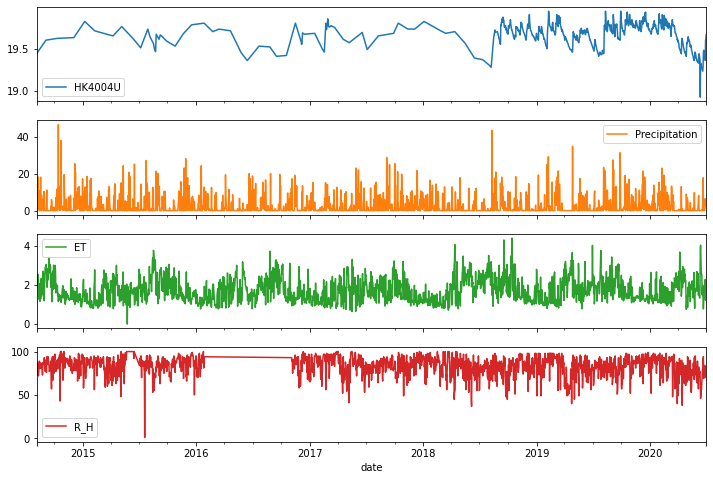

In [202]:
df.set_index('date')[['HK4004U','Precipitation','ET','R_H']].plot(subplots=True)

In [203]:
df_input =df[['HK4004U','Precipitation','ET','R_H','date']]
df_input= df.fillna({'ET':0})
df_input = df.isnull().sum()
df_input

date                0
R_H                 0
Precipitation       0
ET                  0
GW1428A           112
GW1430              0
GW285             224
HK4003U             0
HK4004U             0
HK4012H             0
HK4013H             0
HK4014H             0
HK4101U             0
HK4102U             0
HK4115U           120
HK4206U           547
HK4226B           852
HK4256U          1230
HK4258U          1190
HK4262U          1191
HK4302H          1651
SGU903074482      847
SGU909128423      971
SGU912799781     1211
SGU912799806     1189
SGU912799815     1189
SGU912799853     1211
dtype: int64

In [204]:
#df_input= df.dropna(subset= ['HK4004U'], how='any',axis= 0 ).shape
df_input =df[['HK4004U','Precipitation','ET','R_H']]
df_input

,HK4004U,Precipitation,ET,R_H
25,19.440000,0.0,2.336222,73.0
26,19.445333,9.5,2.145559,84.0
27,19.450667,0.0,2.212505,83.0
28,19.456000,7.1,2.045352,87.0
29,19.461333,18.4,2.539132,76.0
...,...,...,...,...
2176,19.374400,1.0,2.041947,72.0
2177,19.362083,6.5,2.279866,73.0
2178,19.596667,2.5,1.222635,82.0
2179,19.615417,5.5,1.808848,70.0


In [205]:
df_input.describe()

,HK4004U,Precipitation,ET,R_H
count,2156.000000,2156.000000,2156.000000,2156.000000
mean,19.642955,2.606818,1.727549,84.708952
std,0.124735,5.022237,0.607223,11.196039
min,18.930000,0.000000,0.000000,1.000000
25%,19.571758,0.000000,1.241450,79.000000
50%,19.668118,0.100000,1.624961,88.000000
75%,19.730000,2.900000,2.098680,93.270390
max,19.940000,46.800000,4.392801,100.000000


In [14]:
#df_input.query("Precipitation > 25")

In [206]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)


In [207]:
data_scaled

array([[0.5049505 , 0.        , 0.5318296 , 0.72727273],
       [0.51023102, 0.20299145, 0.48842622, 0.83838384],
       [0.51551155, 0.        , 0.50366618, 0.82828283],
       ...,
       [0.66006601, 0.0534188 , 0.27832691, 0.81818182],
       [0.67863037, 0.11752137, 0.41177555, 0.6969697 ],
       [0.7260726 , 0.07051282, 0.28028738, 0.83838384]])

In [208]:
features=data_scaled [:,1:4]
target=data_scaled [:,0]

In [209]:
TimeseriesGenerator(features,target, length=2,sampling_rate=1, batch_size =1)[0]#length=2

(array([[[0.        , 0.5318296 , 0.72727273],
         [0.20299145, 0.48842622, 0.83838384]]]),
 array([0.51551155]))

In [210]:
features=data_scaled [:,1:4]
target=data_scaled [:,0]

In [212]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle = False)
# shuffle = false , is important because it wont randomly shuffle with respect to time and training 80% of the data and not just 20%.

In [213]:
x_train.shape,x_test.shape

((1724, 3), (432, 3))

In [214]:
win_length = 60
batch_size = 60
num_features = 3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length

In [215]:
train_generator[0]

(array([[[0.        , 0.5318296 , 0.72727273],
         [0.20299145, 0.48842622, 0.83838384],
         [0.        , 0.50366618, 0.82828283],
         ...,
         [0.00641026, 0.59034873, 0.94949495],
         [0.        , 0.43340005, 0.90909091],
         [0.        , 0.60387404, 0.96969697]],
 
        [[0.20299145, 0.48842622, 0.83838384],
         [0.        , 0.50366618, 0.82828283],
         [0.1517094 , 0.46561444, 0.86868687],
         ...,
         [0.        , 0.43340005, 0.90909091],
         [0.        , 0.60387404, 0.96969697],
         [0.        , 0.6828486 , 0.80808081]],
 
        [[0.        , 0.50366618, 0.82828283],
         [0.1517094 , 0.46561444, 0.86868687],
         [0.39316239, 0.57802118, 0.75757576],
         ...,
         [0.        , 0.60387404, 0.96969697],
         [0.        , 0.6828486 , 0.80808081],
         [0.        , 0.60653752, 0.81818182]],
 
        ...,
 
        [[0.00641026, 0.59034873, 0.94949495],
         [0.        , 0.43340005, 0.90909

In [216]:
    #test_generator[0]

In [246]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True)) # return seq, hidden state for all the input sequence. To take each observatuion into account and hence return sequence is true  
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dropout(0.3)) # to make 
model.add(tf.keras.layers.LSTM(64,return_sequences=False)) #returns only one hidden state back
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [247]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 60, 128)           67584     
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)              

In [248]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,validation_data =test_generator,
                             shuffle=False, callbacks = [early_stopping])

Epoch 1/50
28/28 [==============================] - 8s 298ms/step - loss: 0.0991 - mean_absolute_error: 0.2435 - val_loss: 0.0385 - val_mean_absolute_error: 0.1716
Epoch 2/50
28/28 [==============================] - 8s 268ms/step - loss: 0.0297 - mean_absolute_error: 0.1411 - val_loss: 0.0220 - val_mean_absolute_error: 0.1153
Epoch 3/50
28/28 [==============================] - 7s 249ms/step - loss: 0.0256 - mean_absolute_error: 0.1318 - val_loss: 0.0216 - val_mean_absolute_error: 0.1124
Epoch 4/50
28/28 [==============================] - 7s 262ms/step - loss: 0.0231 - mean_absolute_error: 0.1229 - val_loss: 0.0199 - val_mean_absolute_error: 0.1096
Epoch 5/50
28/28 [==============================] - 7s 266ms/step - loss: 0.0212 - mean_absolute_error: 0.1182 - val_loss: 0.0184 - val_mean_absolute_error: 0.1084
Epoch 6/50
28/28 [==============================] - 7s 267ms/step - loss: 0.0229 - mean_absolute_error: 0.1231 - val_loss: 0.0181 - val_mean_absolute_error: 0.1053
Epoch 7/50
28/28

In [249]:
model.evaluate_generator(train_generator,verbose=0)
model.evaluate_generator(test_generator,verbose=0)

[0.015608093701303005, 0.09112575650215149]

In [223]:

predictions=model.predict_generator(test_generator) # we can use train generator also to check predictions for the training set. 

In [250]:
predictions.shape[0]

372

In [225]:
predictions

array([[0.74116635],
       [0.73413295],
       [0.7263029 ],
       [0.71853364],
       [0.71125025],
       [0.70482653],
       [0.6973728 ],
       [0.6895661 ],
       [0.68174577],
       [0.67282844],
       [0.66369003],
       [0.65407634],
       [0.64812523],
       [0.6479383 ],
       [0.6514068 ],
       [0.65715545],
       [0.6640019 ],
       [0.6710983 ],
       [0.67769855],
       [0.68381375],
       [0.6898871 ],
       [0.69653416],
       [0.7026755 ],
       [0.7078807 ],
       [0.7119393 ],
       [0.71397465],
       [0.7150416 ],
       [0.7161427 ],
       [0.71782684],
       [0.7203145 ],
       [0.72272986],
       [0.7244664 ],
       [0.7237373 ],
       [0.71897334],
       [0.71136194],
       [0.70259786],
       [0.6943373 ],
       [0.68748575],
       [0.6814953 ],
       [0.6756895 ],
       [0.6700897 ],
       [0.6659986 ],
       [0.6680016 ],
       [0.67611253],
       [0.68759865],
       [0.6996002 ],
       [0.71310073],
       [0.728

In [226]:
y_test


array([0.52475248, 0.52475248, 0.63366337, 0.76237624, 0.75247525,
       0.73267327, 0.73267327, 0.69306931, 0.69306931, 0.7029703 ,
       0.69306931, 0.68316832, 0.66336634, 0.66336634, 0.72277228,
       0.71287129, 0.69306931, 0.67326733, 0.65346535, 0.65346535,
       0.64356436, 0.63366337, 0.65346535, 0.7029703 , 0.69306931,
       0.75247525, 0.78217822, 0.76237624, 0.74257426, 0.8019802 ,
       0.78217822, 0.76237624, 0.77227723, 0.75247525, 0.73267327,
       0.77227723, 0.76237624, 0.77227723, 0.76237624, 0.78217822,
       0.77227723, 0.7519802 , 0.72663366, 0.73188119, 0.77653465,
       0.78371287, 0.77227723, 0.75247525, 0.8019802 , 0.79207921,
       0.77227723, 0.76237624, 0.74257426, 0.73267327, 0.71287129,
       0.7029703 , 0.68316832, 0.66336634, 0.66336634, 0.65264026,
       0.64191419, 0.63118812, 0.62046205, 0.60973597, 0.5990099 ,
       0.58828383, 0.57755776, 0.56683168, 0.55610561, 0.54537954,
       0.53465347, 0.57920792, 0.62376238, 0.669967  , 0.65346

In [227]:
x_test

array([[0.        , 0.83043032, 0.87878788],
       [0.74786325, 0.3157223 , 0.81818182],
       [0.08547009, 0.42109323, 0.95959596],
       ...,
       [0.0534188 , 0.27832691, 0.81818182],
       [0.11752137, 0.41177555, 0.6969697 ],
       [0.07051282, 0.28028738, 0.83838384]])

In [228]:
x_test[:,0:][win_length:]

array([[0.        , 0.48221908, 0.55555556],
       [0.        , 0.43431622, 0.7979798 ],
       [0.        , 0.4921328 , 0.80808081],
       ...,
       [0.0534188 , 0.27832691, 0.81818182],
       [0.11752137, 0.41177555, 0.6969697 ],
       [0.07051282, 0.28028738, 0.83838384]])

In [230]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,0:][win_length:])],axis=1)

In [231]:
df_pred

,0,0,1,2
0,0.741166,0.000000,0.482219,0.555556
1,0.734133,0.000000,0.434316,0.797980
2,0.726303,0.000000,0.492133,0.808081
3,0.718534,0.000000,0.444624,0.777778
4,0.711250,0.000000,0.492621,0.848485
...,...,...,...,...
367,0.651902,0.021368,0.464839,0.717172
368,0.663031,0.138889,0.519000,0.727273
369,0.672670,0.053419,0.278327,0.818182
370,0.681816,0.117521,0.411776,0.696970


In [232]:
rev_trans=scaler.inverse_transform(df_pred)

In [233]:
rev_trans

array([[19.67857802,  0.        ,  2.11829265, 56.        ],
       [19.67147427,  0.        ,  1.90786486, 80.        ],
       [19.66356595,  0.        ,  2.16184164, 81.        ],
       ...,
       [19.60939653,  2.5       ,  1.22263484, 82.        ],
       [19.61863414,  5.5       ,  1.80884821, 70.        ],
       [19.62710203,  3.3       ,  1.23124678, 84.        ]])

In [234]:
df_final=(df_input[predictions.shape[0]*-1:])

In [235]:
df_final.count()

HK4004U          372
Precipitation    372
ET               372
R_H              372
dtype: int64

In [236]:
df_final['HK4004U_pred']=rev_trans[:,0]


<ipython-input-236-e4f3a0fdecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HK4004U_pred']=rev_trans[:,0]


In [237]:
df_final
#df_final.to_csv("Copythecsv.csv")

,HK4004U,Precipitation,ET,R_H,HK4004U_pred
1809,19.578333,0.0,2.118293,56.0,19.678578
1810,19.567500,0.0,1.907865,80.0,19.671474
1811,19.556667,0.0,2.161842,81.0,19.663566
1812,19.545833,0.0,1.953143,78.0,19.655719
1813,19.535000,0.0,2.163988,85.0,19.648363
...,...,...,...,...,...
2176,19.374400,1.0,2.041947,72.0,19.588421
2177,19.362083,6.5,2.279866,73.0,19.599661
2178,19.596667,2.5,1.222635,82.0,19.609397
2179,19.615417,5.5,1.808848,70.0,19.618634


<AxesSubplot:>

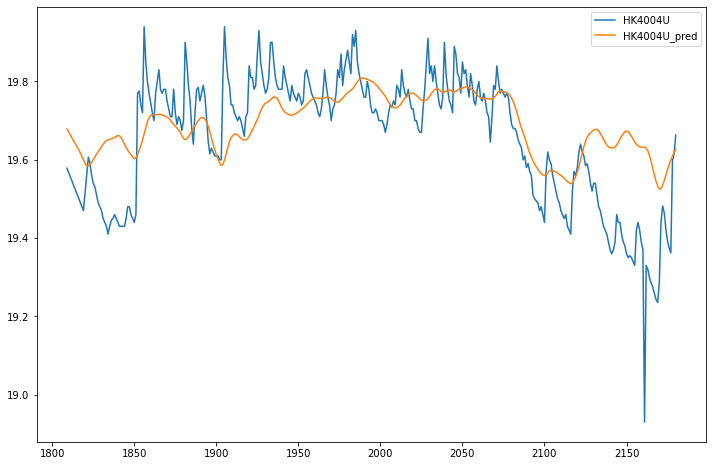

In [238]:
df_final[['HK4004U','HK4004U_pred']].plot()
#plt.savefig("HK4004U,HK4004U_pred")

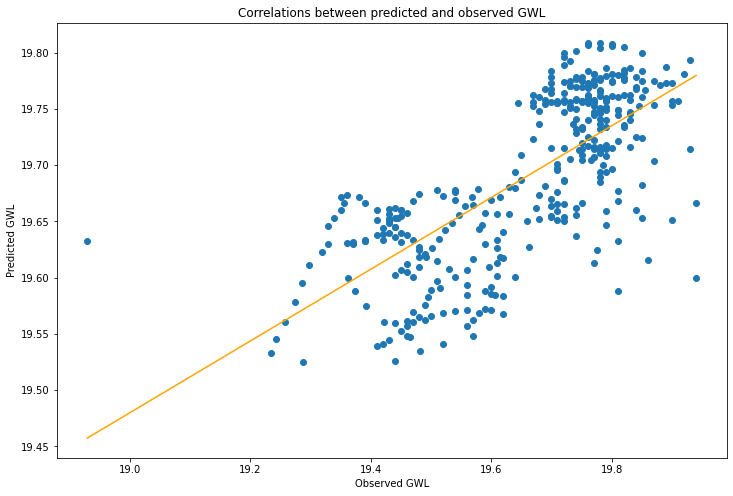

In [240]:
x =df_final['HK4004U']
y= df_final['HK4004U_pred']
np.corrcoef(x,y)
plt.scatter(x,y)
plt.title('Correlations between predicted and observed GWL')
plt.xlabel('Observed GWL')
plt.ylabel('Predicted GWL')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)),color="orange")
plt.show()

In [241]:
def polyfit(x, y, degree):
    x =df_final['HK4013H_pred']
    y= df_final['HK4013H']
    degree = 3
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoeff(x,y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results
print(polyfit)


<function polyfit at 0x000001CC6DA57820>
